### Multicollinearity & VIFs

Using the notebook here, answer the quiz questioons below regarding multicollinearity.

To get started let's read in the necessary libraries and the data that will be used.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from patsy import dmatrices
import matplotlib.pyplot as plt
import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

df = pd.read_csv('02-Dataset/house_prices.csv')
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


`1.`Use [seaborn](https://seaborn.pydata.org/examples/scatterplot_matrix.html) to look at pairwise relationships for all of the quantitative, explanatory variables in the dataset by running the cell below.  You might also investigate how to add color (**hue**) for the house style or neighborhood.  Use the plot to answer the first quiz questions below.

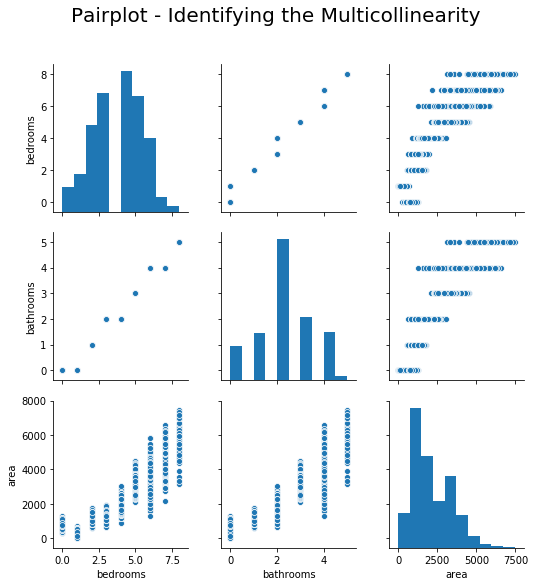

In [2]:
sns.pairplot(df[['bedrooms', 'bathrooms', 'area']]);
plt.suptitle('Pairplot - Identifying the Multicollinearity', fontsize = 20,  y = 1.08);

`2.` Earlier, you fit linear models between each individual predictor variable and price, as well as using all of the variables and the price in a multiple linear regression model. Each of the individual models showed a positive relationship - that is, when bathrooms, bedrooms, or area increase, we predict the price of a home to increase. 

Fit a linear model to predict a home **price** using **bedrooms**, **bathrooms**, and **area**. Use the summary to answer the second quiz question below. **Don't forget an intercept.**

In [3]:
# Copying the df.
df_q2 = df.copy()

# Adding the intercept.
df_q2['intercept'] = 1

# Creating the object.
lm_q2 = sm.OLS(df_q2['price'],df_q2[['intercept','area','bedrooms','bathrooms']])

# Calculating the Multiple Linear Model
results_q2 = lm_q2.fit()

# Priting the results.
results_q2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     4230.
Date:                Fri, 11 Jan 2019   Prob (F-statistic):               0.00
Time:                        04:23:20   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6024   BIC:                         1.691e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.007e+04   1.04e+04      0.972      0.331   -1.02e+04    3.04e+04
area         345.9110      7.227     47.863      0.000     331.743     360.079
bedrooms   -2925.8063   1.03e+04     -0.285      0.775    -2.3e+04    1.72e+04
bathrooms   7345.3917   1.43e+04      0.515      0.607   -2.06e+04    3.53e+04
==============================================================================
Omnibus:                      367.658   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.116
Skew:                           0.536   Prob(JB):                     9.40e-77
Kurtosis:                       2.503   Cond. No.                     1.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

`3.` Calculate the VIFs for each variable in your model.  Use quiz 3 below to provide insights about the results of your VIFs.  [Here](https://etav.github.io/python/vif_factor_python.html) is the helpful post again, in case you need it!

### Easy way 

In [4]:
y, X = dmatrices('price ~ area + bedrooms + bathrooms', df, return_type = 'dataframe')
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns

vif

,VIF Factor,features
0,7.327102,Intercept
1,5.458190,area
2,20.854484,bedrooms
3,19.006851,bathrooms


### Didactic Way

In [5]:
# Copying the df.
df_q5 = df.copy()

# Adding the intercept.
df_q5['intercept'] = 1

# Creating the object.
lm_q5 = sm.OLS(df_q5['intercept'],df_q5[['area','bedrooms', 'bathrooms']])

# Calculating the coefficients. Later gathering the R-Squared.
r2_intercept = lm_q5.fit().rsquared

# Creating the object.
lm_q5 = sm.OLS(df_q5['area'],df_q5[['intercept','bedrooms', 'bathrooms']])

# Calculating the coefficients. Later gathering the R-Squared.
r2_area = lm_q5.fit().rsquared

# Creating the object.
lm_q5 = sm.OLS(df_q5['bedrooms'],df_q5[['intercept','area', 'bathrooms']])

# Calculating the coefficients. Later gathering the R-Squared.
r2_bedrooms = lm_q5.fit().rsquared

# Creating the object.
lm_q5 = sm.OLS(df_q5['bathrooms'],df_q5[['intercept','area', 'bedrooms']])

# Calculating the coefficients. Later gathering the R-Squared.
r2_bathrooms = lm_q5.fit().rsquared

# Printing all r2
r2_intercept, r2_area, r2_bedrooms, r2_bathrooms

(0.863520388590131, 0.8167890866692035, 0.952048682065964, 0.9473873926707678)

In [6]:
# Calculating the VIF's
1/(1 - r2_intercept), 1/(1 - r2_area), 1/(1 - r2_bedrooms), 1/(1 - r2_bathrooms)

(7.327101752926658, 5.458190136274522, 20.854484153608585, 19.006851223744377)

As expected, these values are the same from the "Easy Way".

`4.` Remove bathrooms from your above model.  Refit the multiple linear regression model and re-compute the VIFs.  Use the final quiz below to provide insights about your results.

### Easy way 

In [7]:
y, X = dmatrices('price ~ area + bedrooms', df, return_type = 'dataframe')
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns

vif

,VIF Factor,features
0,6.063895,Intercept
1,5.345400,area
2,5.345400,bedrooms


### Didactic Way

In [8]:
# Copying the df.
df_q6 = df.copy()

# Adding the intercept.
df_q6['intercept'] = 1

# Creating the object. Calculating coefficients. Assigning r2 in variable.
r2_intercept = sm.OLS(df_q6['intercept'],df_q6[['area','bedrooms']]).fit().rsquared
r2_area = sm.OLS(df_q6['area'],df_q6[['intercept','bedrooms']]).fit().rsquared
r2_bedrooms = sm.OLS(df_q6['bedrooms'],df_q6[['intercept','area']]).fit().rsquared

# VIF's Calculation.
1/(1 - r2_intercept), 1/(1 - r2_area), 1/(1 - r2_bedrooms)

(6.063894932472694, 5.345399662089865, 5.345399662089871)